<h1>Project (Getting Real about Fake News)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Remove-columns" data-toc-modified-id="Remove-columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Remove columns</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Incorrect-values" data-toc-modified-id="Incorrect-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Incorrect values</a></span></li></ul></li><li><span><a href="#Observation" data-toc-modified-id="Observation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Observation</a></span><ul class="toc-item"><li><span><a href="#Columns-plot" data-toc-modified-id="Columns-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Columns plot</a></span></li><li><span><a href="#Aggregate" data-toc-modified-id="Aggregate-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Aggregate</a></span></li></ul></li></ul></div>


In [1]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud_plot import *
from PIL import Image
import geopandas
import descartes

my_colors = ['royalblue','seagreen','y', 'salmon','blueviolet','orangered' ,'olive','deeppink', 'purple', 'gold', 'cyan' ]

# Description
‘Fake News’ is one of the most debated topics in the context of current political discourse across the world. In the 2016 presidential election in US, the impact of misleading ‘News’ like articles received a substantial attention, particularly after the election of President Trump. According to a Pew Research poll*, 64% of adults in US say that fake news has left them confused about basic facts. Given the ubiquity of internet and ease of disseminating unverified information on internet, it is imperative that we need to develop tools and methods to indicate the veracity of a piece of information.

I started with fake_real dataset provided by Kaggle.com

In [4]:
media = pd.read_csv('data/fake_real_dataset_3.csv')  
media.sample(30)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,uuid,ord_in_thread,author,published,title,text,language,...,type,content,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,stance
796,796,796,797,e400c4fa1c0dbf380fedc97c5f05ad4395d2dc5f,0,hqanon,2016-10-29T03:00:00.000+03:00,Hillary: Leaked Audio of Her Discussing Riggin...,"On September 5, 2006, Eli Chomsky was an edito...",english,...,bs,on september eli chomsky editor staff writer j...,0.879246,business,0,0.997421,0,0.5,-0.093500,discuss
643,643,643,643,f093f81bb523beb90bd08e46f70af92743916843,0,Alex Ansary,2016-11-01T20:57:43.477+02:00,"FBI sees no ties between Trump, Putin","FBI sees no ties between Trump, Putin 11/01/20...",english,...,bs,fbi see tie trump putin press tv the us federa...,0.945123,business,0,0.001806,3,0.9,-0.134000,discuss
2910,2910,2910,2911,8bdffa9f76249eb96db9686eae24ecf44e6500a5,0,NaN,2016-11-19T02:00:00.000+02:00,TransSask fostering community of support for t...,TransSask fostering community of support for t...,english,...,news,transsask fostering community support transgen...,0.887616,politics,1,0.998618,0,0.5,0.139000,agree
108,108,108,108,a0785e99cf9a112ad97688b2ee80a6524068c8c8,2,Anonymous,2016-10-30T10:01:00.000+02:00,There is the guy who can leaf Trump to the whi...,There is the guy who can leaf Trump to the whi...,english,...,bs,there guy leaf trump whitehouse imagine shock ...,0.998344,politics,0,0.009972,0,0.5,0.000000,agree
137,137,137,137,999af667dd0fec633e0a98865fb8d973a39fcb0a,0,tokyowashi (noreply@blogger.com),2016-11-01T09:56:04.637+02:00,Insiders Threaten to Expose Hillary's Pedophil...,BREAKING BOMBSHELL! FBI NYPD INSIDERS LEAK - E...,english,...,bs,breaking bombshell ! fbi nypd insiders leak em...,0.998368,tech,0,0.997352,0,0.5,-0.229000,discuss
683,683,683,683,7312027c193bc6b72aed6af0f49c150d5af0c11c,0,Alex Ansary,2016-11-07T20:01:08.261+02:00,US Military Hackers Claim Penetration of Russia,US Military Hackers Claim Penetration of Russi...,english,...,bs,us military hackers claim penetration russia s...,0.688363,business,0,0.997933,0,0.9,0.000000,disagree
3039,3039,3039,3040,d7a0f337bd69cdb87dbdb40b2dbe70fa4f6f471f,0,NaN,2016-11-14T01:39:00.000+02:00,"""[ Politics ] Open Question : My friend says h...","""[ Politics ] Open Question : My friend says h...",english,...,news,politics open question my friend say hitler de...,0.925229,sport,1,0.001838,0,0.5,0.191667,agree
3459,3459,3459,3460,afa832acc51c7d2a623bceacbf2fd4e21e4d49cb,0,NaN,2016-11-25T16:55:00.000+02:00,India's Modi defends cash ban after criticism ...,India's Modi defends cash ban after criticism ...,english,...,news,india modi defends cash ban criticism afp,0.685998,business,1,0.997629,0,0.5,-0.260000,agree
3520,3520,3520,3521,53062bf42b2d3ffb94d7cba7ec5b5b1893d04426,0,NaN,2016-11-19T22:23:00.000+02:00,"""Small, Non-Expensive Electric Impulse Thermon...","""Small, Non-Expensive Electric Impulse Thermon...",english,...,news,small non expensive electric impulse thermonuc...,0.866053,business,1,0.002059,0,0.5,-0.204000,discuss
617,617,617,617,383cb0f482152ed519a837daa8352bf3007e979e,0,Alex Ansary,2016-10-28T05:35:13.475+03:00,Julian Assange Proof of Life Video a FAKE,Julian Assange Proof of Life Video a FAKE 10/2...,english,...,bs,julian assange proof life video fake in today ...,0.964482,entertainment,0,0.997737,0,0.9,-0.445000,agree


In [5]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3709 non-null   int64  
 1   Unnamed: 0.1        3709 non-null   int64  
 2   Unnamed: 0.1.1      3709 non-null   int64  
 3   uuid                3709 non-null   object 
 4   ord_in_thread       3709 non-null   int64  
 5   author              2776 non-null   object 
 6   published           3709 non-null   object 
 7   title               3709 non-null   object 
 8   text                3709 non-null   object 
 9   language            3709 non-null   object 
 10  crawled             3709 non-null   object 
 11  site_url            3709 non-null   object 
 12  country             3709 non-null   object 
 13  domain_rank         3709 non-null   int64  
 14  thread_title        3705 non-null   object 
 15  spam_score          3709 non-null   float64
 16  main_i

# Clean Data

## Remove columns

During my initial analysis I realized that the dataset contains some columns that dont seems to be useful, so I decided to remove these columns.

In [6]:
""" Our dataset columns"""
media.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'uuid', 'ord_in_thread',
       'author', 'published', 'title', 'text', 'language', 'crawled',
       'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score',
       'main_img_url', 'replies_count', 'participants_count', 'likes',
       'comments', 'shares', 'type', 'content', 'spam_score_fector',
       'category_factor', 'fake', 'click_bait_score', 'toxicity_factor',
       'src_url_polarity', 'sentiment_score', 'stance'],
      dtype='object')

In [7]:
media.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'uuid', 'ord_in_thread', 'author', 'likes','language','click_bait_score',
            'spam_score_fector', 'toxicity_factor', 'content', 'comments', 'main_img_url'], axis=1, inplace=True)

In [8]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   published           3709 non-null   object 
 1   title               3709 non-null   object 
 2   text                3709 non-null   object 
 3   crawled             3709 non-null   object 
 4   site_url            3709 non-null   object 
 5   country             3709 non-null   object 
 6   domain_rank         3709 non-null   int64  
 7   thread_title        3705 non-null   object 
 8   spam_score          3709 non-null   float64
 9   replies_count       3709 non-null   int64  
 10  participants_count  3709 non-null   int64  
 11  shares              3709 non-null   int64  
 12  type                3709 non-null   object 
 13  category_factor     3709 non-null   object 
 14  fake                3709 non-null   int64  
 15  src_url_polarity    3709 non-null   float64
 16  sentim



We have also some duplicated columns **(title, thread_title) , (published, crawled)**. So I decide  to compare columns and keep the one who contains more information.

<li>title : 3389 non-null</li>
<li>thread_title : 3707 non-null</li>

So we keep thread_title, published and remove title, crawled

In [9]:
media.drop(['title', 'crawled'], axis=1, inplace=True)

In [10]:
media.isna().sum()

published             0
text                  0
site_url              0
country               0
domain_rank           0
thread_title          4
spam_score            0
replies_count         0
participants_count    0
shares                0
type                  0
category_factor       0
fake                  0
src_url_polarity      0
sentiment_score       0
stance                0
dtype: int64

##### change published column name to date

In [131]:
media.rename({'published': 'date'}, axis=1, inplace=True)

## Missing values

Only **thread_title** has 4 non-null so I replace it with 'missing'

In [11]:
media.thread_title.fillna('missing', inplace=True)



## Incorrect values

We change column date to "%Y-%M-%d" format

In [132]:
media['date'] = pd.to_datetime(media['date'], utc=True).dt.date
media.date

0       2016-10-26
1       2016-10-29
2       2016-10-30
3       2016-11-01
4       2016-11-01
           ...    
3704    2016-11-16
3705    2016-11-30
3706    2016-11-21
3707    2016-11-17
3708    2016-11-07
Name: date, Length: 3709, dtype: object

In [13]:
media.stance.unique()

array(['discuss', 'unrelated', 'agree', 'disagree'], dtype=object)

Create a new factor from **stance** that help us show stats for this column

In [14]:
media['stance_factor_num'] = 0     
media.loc[media.stance.str.contains('agree'),'stance_factor_num'] = 0  
media.loc[media.stance.str.contains('discuss'),'stance_factor_num'] = 0.3
media.loc[media.stance.str.contains('disagree'),'stance_factor_num'] = 0.8
media.loc[media.stance.str.contains('unrelated'),'stance_factor_num'] = 1.0 

Modify  **fake**  column to be more meaningful. (0,1) --> (fake,true)

In [15]:
media.fake = media.fake.map(lambda x:'fake' if x==0 else 'real')

In [16]:
media.head(20)
media.domain_rank.describe()
media.domain_rank[media.domain_rank>5].unique().round().min()
media.domain_rank = media.domain_rank.map(lambda x:media.domain_rank[media.domain_rank>0].unique().round().min()  if x==0  else x)
media.domain_rank = media.domain_rank.map(lambda x:media.domain_rank[media.domain_rank<7310981].unique().round().min()  if x==7310981  else x)
media.domain_rank.unique().max()

2920561

In [133]:
media.dtypes

date                   object
text                   object
site_url               object
country                object
domain_rank             int64
thread_title           object
spam_score            float64
replies_count           int64
participants_count      int64
shares                  int64
type                   object
category_factor        object
fake                   object
src_url_polarity      float64
sentiment_score       float64
stance                 object
stance_factor_num     float64
dtype: object

In [18]:
summary=media.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
domain_rank,3709.0,129241.262874,335332.052800,5.000,285.00,943.0,79225.0000,2920561.0
spam_score,3709.0,0.044945,0.160185,0.000,0.00,0.0,0.0000,1.0
replies_count,3709.0,2.292532,15.021682,0.000,0.00,0.0,0.0000,500.0
participants_count,3709.0,2.107576,9.620020,0.000,0.00,1.0,1.0000,296.0
shares,3709.0,24.411971,113.826618,0.000,0.00,0.0,0.0000,999.0
src_url_polarity,3709.0,0.604341,0.232929,0.200,0.50,0.5,0.9000,1.0
sentiment_score,3709.0,0.010939,0.193617,-0.767,-0.08,0.0,0.0865,1.0
stance_factor_num,3709.0,0.204853,0.292661,0.000,0.00,0.0,0.3000,1.0


# Observation

In [60]:
media.head(20)
media.domain_rank.describe()
media.domain_rank.unique().round()>0
media.domain_rank[media.domain_rank.round() == 0]

1211    0
1212    0
1516    0
Name: domain_rank, dtype: int64

In [134]:
media.columns

Index(['date', 'text', 'site_url', 'country', 'domain_rank', 'thread_title',
       'spam_score', 'replies_count', 'participants_count', 'shares', 'type',
       'category_factor', 'fake', 'src_url_polarity', 'sentiment_score',
       'stance', 'stance_factor_num'],
      dtype='object')

In [18]:
media.site_url.unique()
media.country.unique()
media.domain_rank.unique()
media.spam_score.unique() 
media.replies_count.unique()
media.participants_count.unique()
media.shares.unique().max()
media.fake.unique()
media.src_url_polarity.unique()
media[media.src_url_polarity == 0.2].site_url.unique()
media.sentiment_score.unique().max()
media.stance.unique()
media.stance_factor_num.unique()

array([0.3, 1. , 0. , 0.8])

#### spam_score : 
<li> 1%-30% is considered a Low Spam Score.</li>
<li> 31%-60% is considered a Medium Spam Score.</li>
<li> 61%-100% is considered a High Spam Score.</li>

A high Spam Score for your site, or a site you're looking at, doesn't mean this site is spammy. It's a sign that you should do some more investigation into the quality and relevance of this site.

## Columns plot

#### Media Type
<li>Bar plot</li>
<li>Pie chart</li>

In [19]:
media.type.unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'news'], dtype=object)

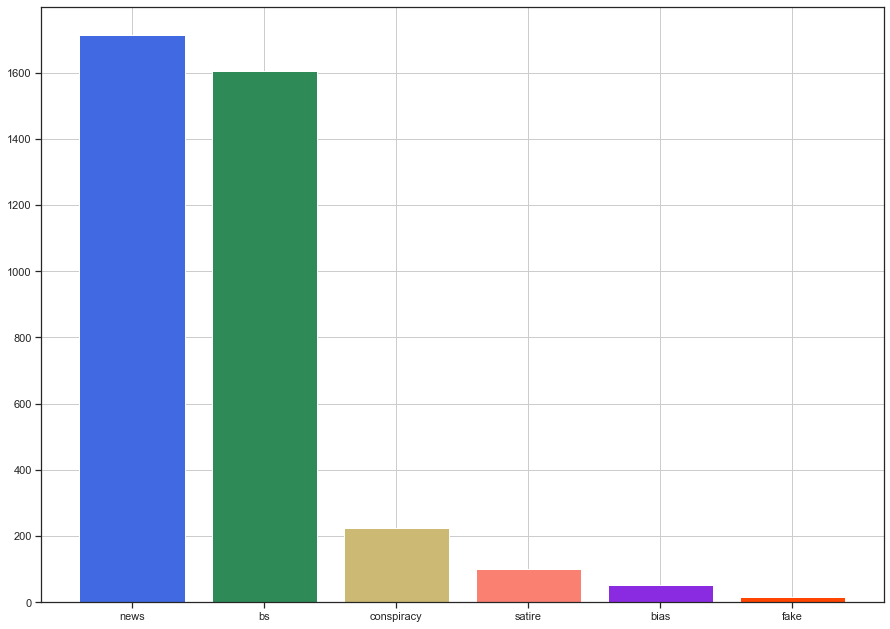

In [239]:
#my_colors = 'rgbkymc'
media_types = media.type.value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.bar(media_types.index,media_types.values, color=my_colors)
plt.show()
fig.savefig('docs/img/media_types.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

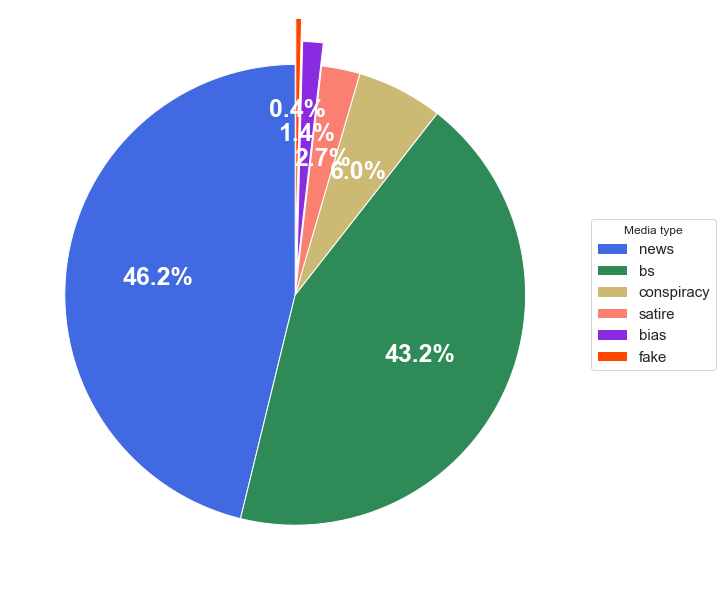

In [245]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

labels = (np.array(media_types.index))
sizes = (np.array((media_types / media_types.sum())*100))

fig = plt.figure(figsize = [8, 8])
ax1 = fig.add_axes([0,0,1,1])

# Wedge properties 
wp = { 'linewidth' : 1} 
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.2) 

wedges, texts, autotexts = ax1.pie(sizes, autopct=lambda pct: func(pct, sizes),
                                   textprops=dict(color="w"), colors=my_colors,
                                   startangle = 90, explode = explode, 
                                   wedgeprops = wp)

ax1.legend(wedges, labels,
          title="Media type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=25, weight="bold")
#plt.setp(texts, size=10, weight="bold")
plt.show()
#fig.savefig('docs/img/media_types_piechart.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)


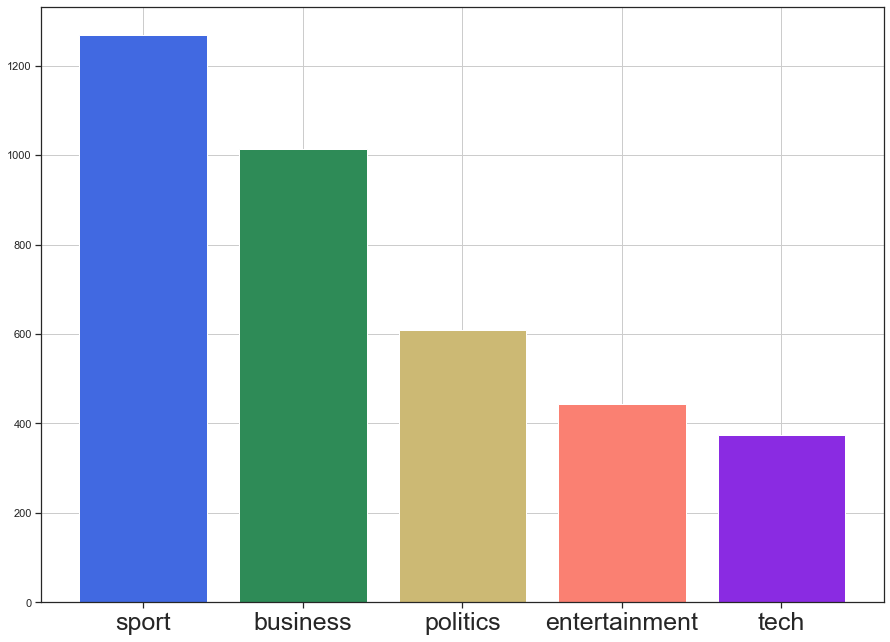

In [237]:
#rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15.0, 'axes.titlesize': 15, 'figure.figsize':(11.7,8.27)}
#plt.rcParams.update(**rc)sns.set(font_scale = 2)
media_cat = media.category_factor.value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.bar(media_cat.index,media_cat.values, color=my_colors)
ax.set_xticklabels(media_cat.index, fontsize=25)
#ax.set_yticklabels(media_cat.values, fontsize=10)

plt.show()
fig.savefig('docs/img/media_categories.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

#### Country column

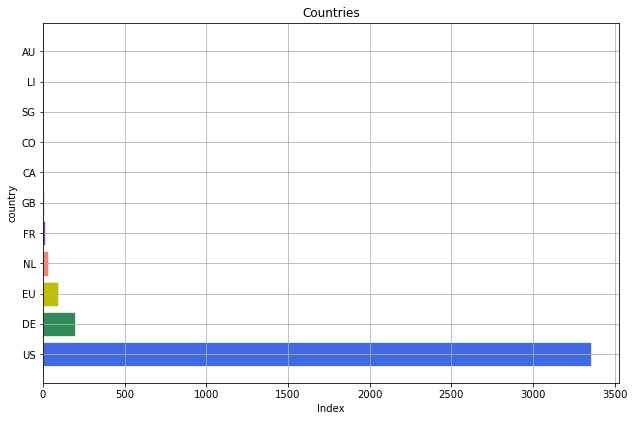

In [146]:
media.country.unique()
media_counties = media.country.value_counts()
fig_c = plt.figure(figsize = (8,5))
ax_c = plt.axes(facecolor='#E6E6E6')
plt.grid(color='w', linestyle='solid')
ax_c = fig_c.add_axes([0,0,1,1])
ax_c.grid()
ax_c.barh(media_counties.index,media_counties.values,color=my_colors,edgecolor='#E6E6E6')
plt.title('Countries')
plt.xlabel('Index')
plt.ylabel('country')  
plt.show()
fig_c.savefig('docs/img/media_country_bars.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x="budget2019", y="ministere", data=budget, label="Budget 2019")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

fig_c = plt.figure(figsize = (8,5))
sns.set(style="darkgrid")
sns.set_color_codes("pastel")
sns.barplot(x="country", y="ministere", data=media, label="Budget 2019")
sns.barplot(x="country", y="ministere", data=media, label="Budget 2019")

sns.despine(left=True, bottom=True)
#ax_c = plt.axes(facecolor='#E6E6E6')
#plt.grid(color='w', linestyle='solid')
#ax_c = fig_c.add_axes([0,0,1,1])

plt.show()
#fig_c.savefig('docs/img/media_country_bars.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

#### Label column

dt.label.value_counts()

#### Text column
we can create a wordcloud from text column in dataset.

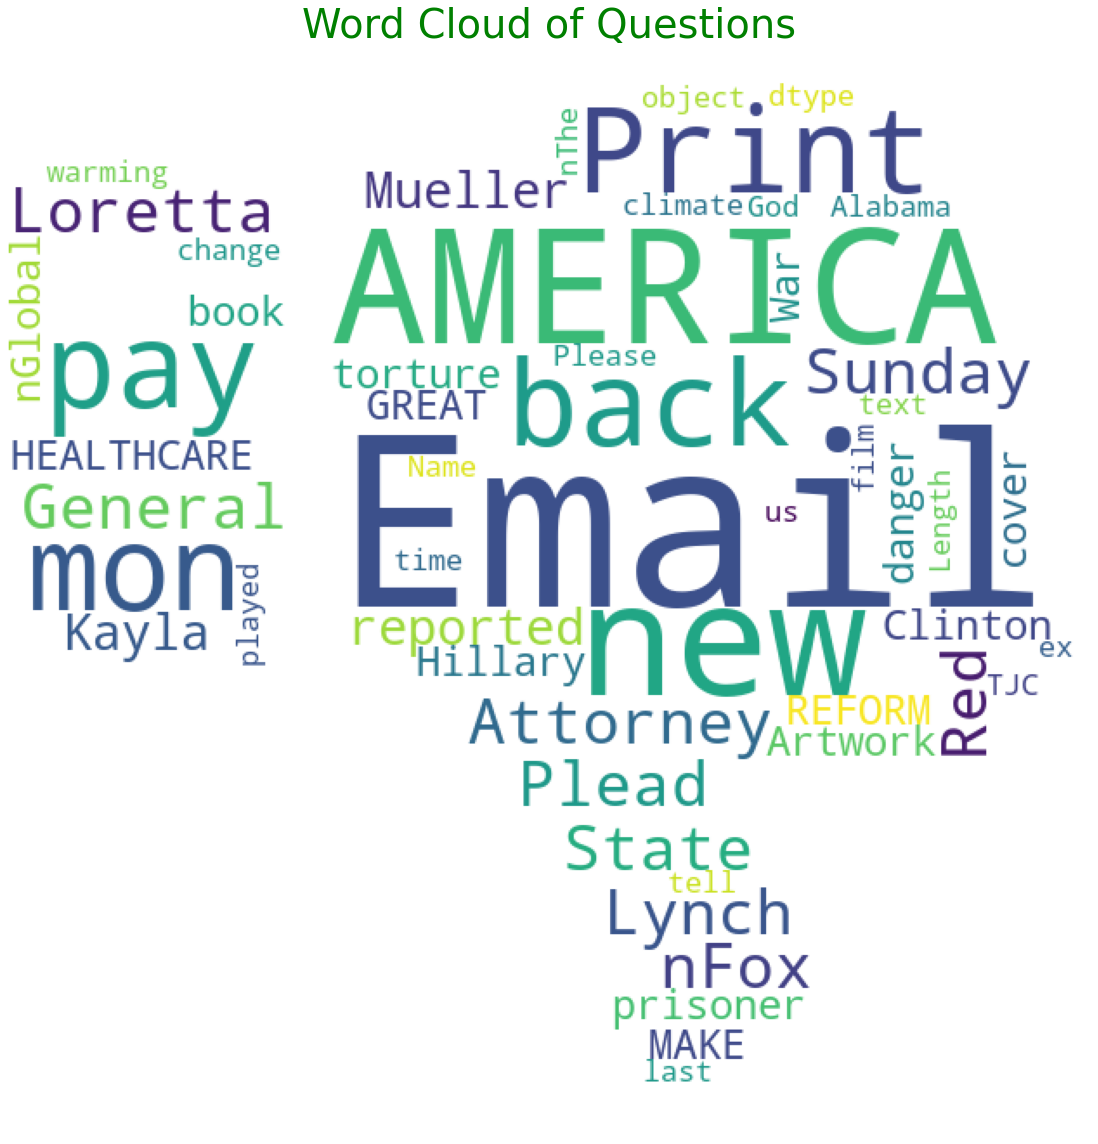

In [17]:
# Create and generate a word cloud image:
upvote_mask = np.array(Image.open('docs/img/upvote_1.jpg'))
plot_wordcloud(media[media["fake"]=="fake"]["text"], upvote_mask, max_words=300000, 
               max_font_size=300, title="Word Cloud of Questions")

## Aggregate

##### Country vs others

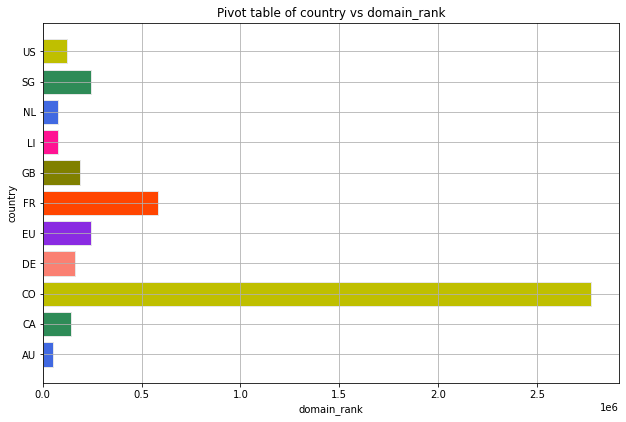

In [100]:
media.pivot_table(columns='country')
country_domain = media.pivot_table(index='country', values='domain_rank', aggfunc='mean').reset_index()
country_domain.country
fig_c = plt.figure(figsize = (8,5))
ax_c = plt.axes(facecolor='#E6E6E6')
plt.grid(color='w', linestyle='solid')
ax_c = fig_c.add_axes([0,0,1,1])
ax_c.grid()
ax_c.barh(country_domain.country,country_domain.domain_rank,edgecolor='#E6E6E6',color=my_colors)
plt.title('Pivot table of country vs domain_rank')
plt.xlabel('domain_rank')
plt.ylabel('country')  
plt.show()
fig_c.savefig('docs/img/country_domain_bars.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

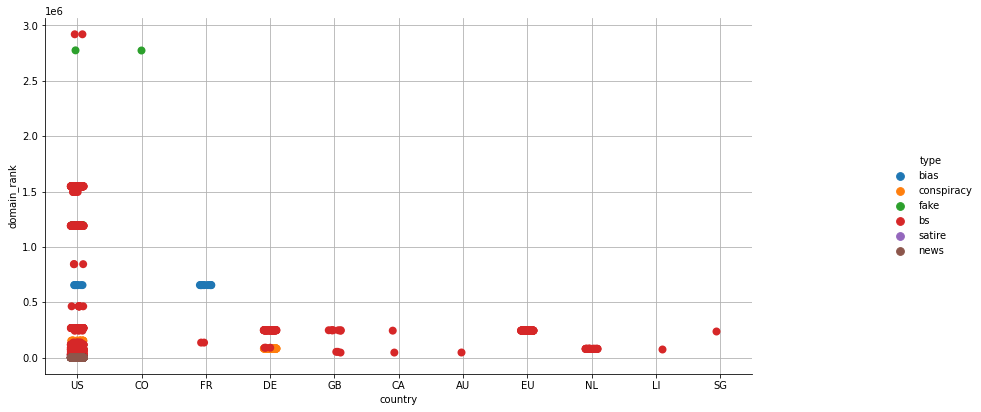

In [136]:

#media.pivot_table(columns='country')
country_fake_domain = media.groupby(['type','country']).domain_rank.mean().round().reset_index()
country_fake_domain

ax = sns.catplot(data=media, x='country', hue='type', y='domain_rank', s = 8)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(15)
ax.set_xlabel(fontsize=30)
ax.set_ylabel(fontsize=20)
plt.grid()
plt.show()

In [141]:
rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15.0, 'axes.titlesize': 10, 'figure.figsize':(11.7,8.27)}
plt.rcParams.update(**rc)
#sns.set(rc={'figure.figsize':(11.7,8.27)})

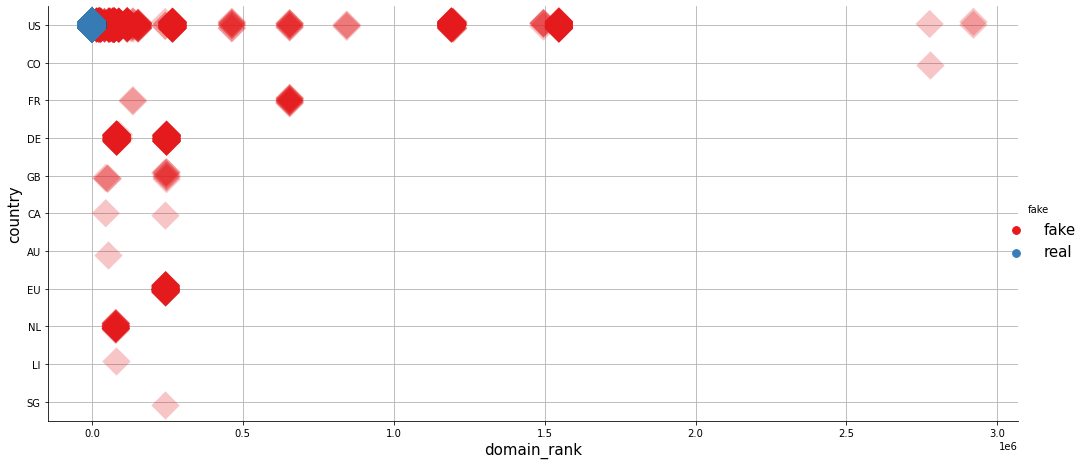

In [168]:
ax = sns.catplot(data=media,y='country', hue='fake', x='domain_rank', s = 20, 
                 palette="Set1", size=20, marker="D", 
                 edgecolor="gray",
                 alpha=.25)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(15)
#ax.set_ylabel('mylabel',size=6)
plt.grid()
plt.show()
ax.fig.savefig('docs/img/country_fake_domain.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

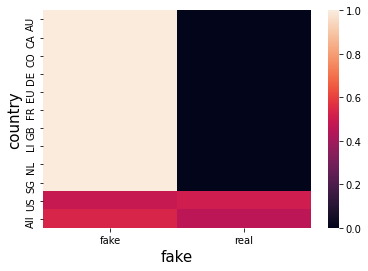

In [176]:
sns.heatmap((pd.crosstab(media.country, media.fake, margins=True, normalize="index")))

#### domain_rank column

 If a Web site is not included in the top 1 million list, we
assign the site a ranking of 1 000 001. The credible Web sites publishing real news have
much higher domain rankings than sites publishing fake
news across all three datasets.
The medium ranking among all Web sites publishing
**fake news is 987 298**, while the medium ranking
among all Web sites publishing **real news is 158**. This
observation confirms that the Web sites with influential
real news are typically very credible and top sites.



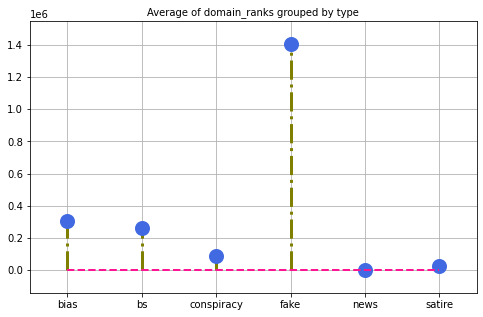

type
bias           302333.0
bs             261972.0
conspiracy      85434.0
fake          1407499.0
news              352.0
satire          22768.0
Name: domain_rank, dtype: float64

In [169]:
media.domain_rank
dk_type = media.groupby("type").domain_rank.mean().round()

fig = plt.figure(figsize = (8,5))
(markerLines, stemLines, baseLines) = plt.stem(dk_type.index, dk_type.values)

plt.grid()
plt.setp(markerLines, color = 'royalblue', markersize = 12,
            markeredgecolor = 'royalblue', markeredgewidth = 3)
plt.setp(stemLines, color = 'olive', linewidth = 3, linestyle = 'dashdot')
plt.setp(baseLines, color = 'deeppink', linewidth = 2, linestyle  = 'dashed')
plt.margins(0.1, 0.1)
plt.title('Average of domain_ranks grouped by type')
plt.show()
fig.savefig('docs/img/mean_dk_type_lolli_plot.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

dk_type

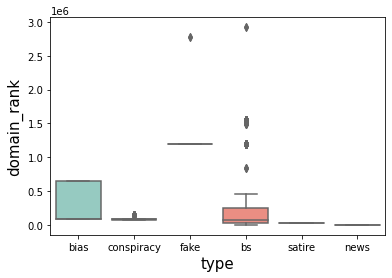

In [170]:
sns.boxplot(x=media.type, y=media.domain_rank, palette="Set3")

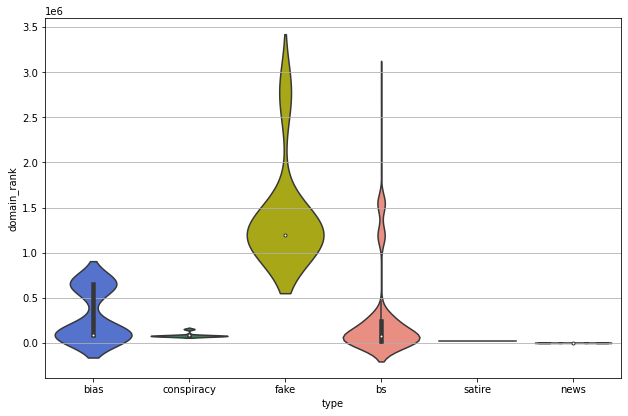

In [29]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax = sns.violinplot(x=media.type,y=media.domain_rank,
                    data=media,
                    scale="width", palette=my_colors)
#fig.savefig('docs/img/media_dk_type_violinplt.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)


##### Spam scores vs others

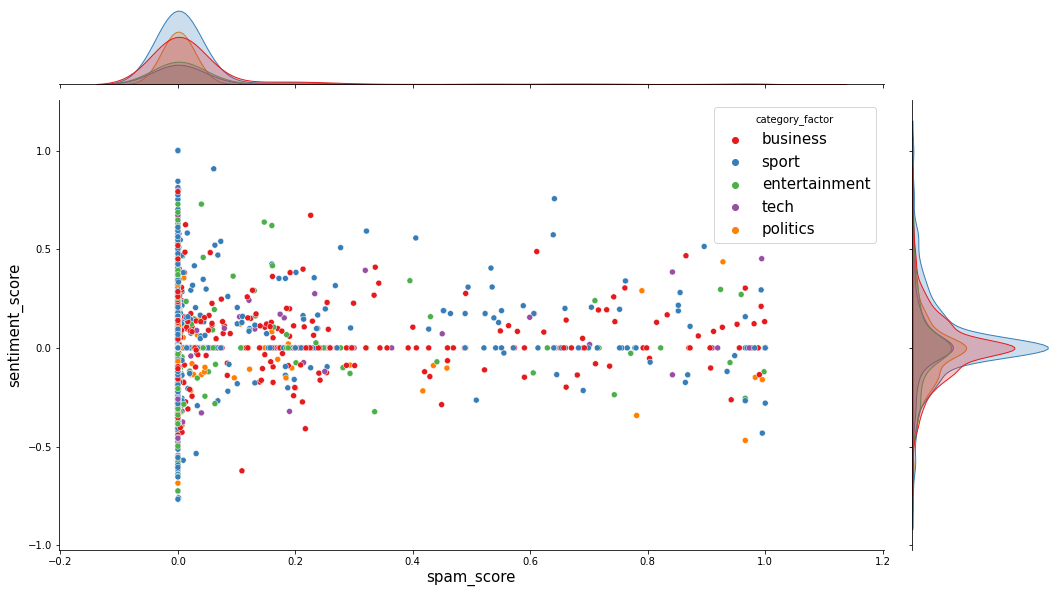

In [46]:
g = sns.jointplot(data=media, x='spam_score', y='sentiment_score', hue='category_factor', palette='Set1')
g.fig.set_figwidth(16.27)
g.fig.set_figheight(8.7)
plt.show()

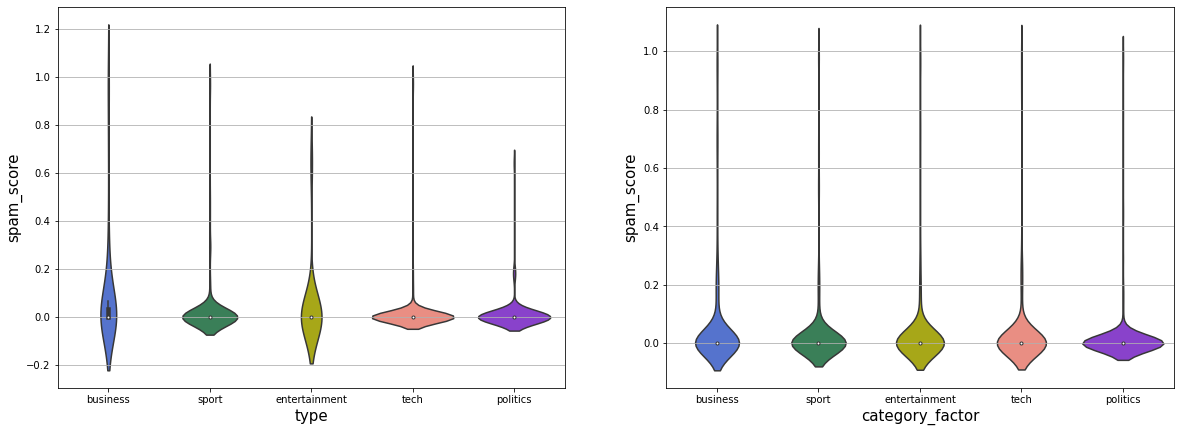

In [81]:
#fig = plt.figure(figsize = (8,5))
#fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1 = fig.add_axes([0,0,1,1])
#ax1.grid()
f, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=True)
axes[0].grid()
axes[1].grid()
sns.violinplot(data=media, x='type', y='spam_score', ax=axes[0], palette=my_colors)
sns.violinplot(data=media, x='category_factor', y='spam_score', ax=axes[1], palette=my_colors)
f.savefig('docs/img/spam_type_category_violinplt.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
#plt.show()

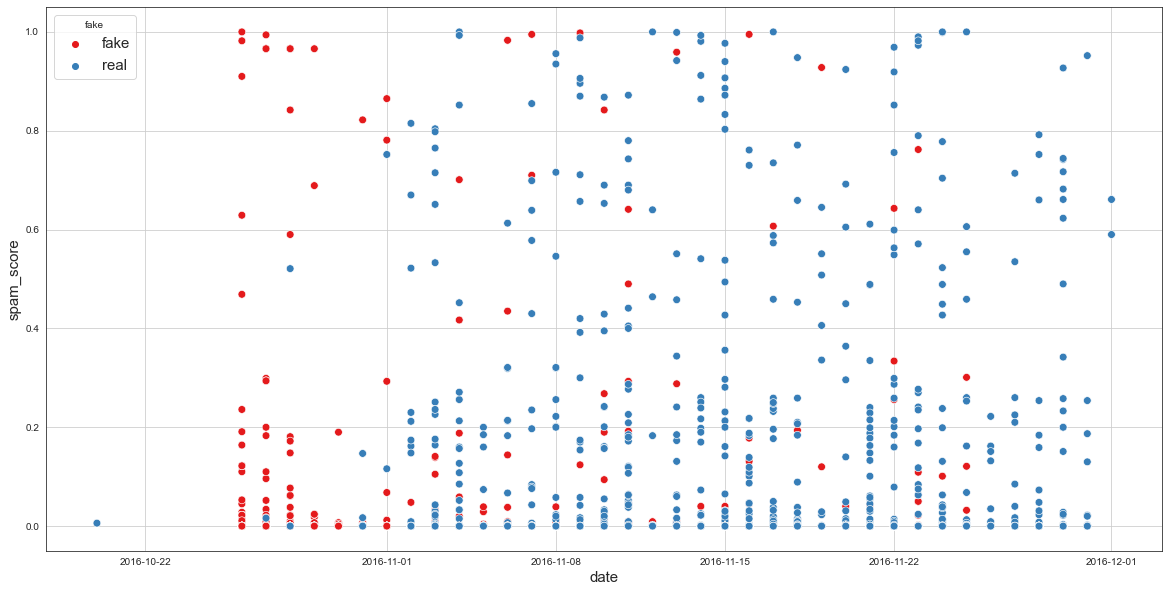

In [158]:
# = media.groupby("type").domain_rank.mean().round()
rc={'axes.labelsize': 15, 'font.size': 10, 'legend.fontsize': 15.0, 'axes.titlesize': 10, 'figure.figsize':(11.7,8.27)}
plt.rcParams.update(**rc)
#fig = plt.figure(figsize = (20,10))
#ax = fig.add_axes([0,0,1,1])
f, ax = plt.subplots(figsize = (20,10))
ax.grid()
ax = sns.scatterplot(x=media.date,y=media.spam_score,
                    hue=media.fake,s=60,  palette='Set1')
plt.show()
f.savefig('docs/img/spam_date_fake_violinplt.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
#sns.set_style("white")
#ax.set_xticklabels(rotation=60)

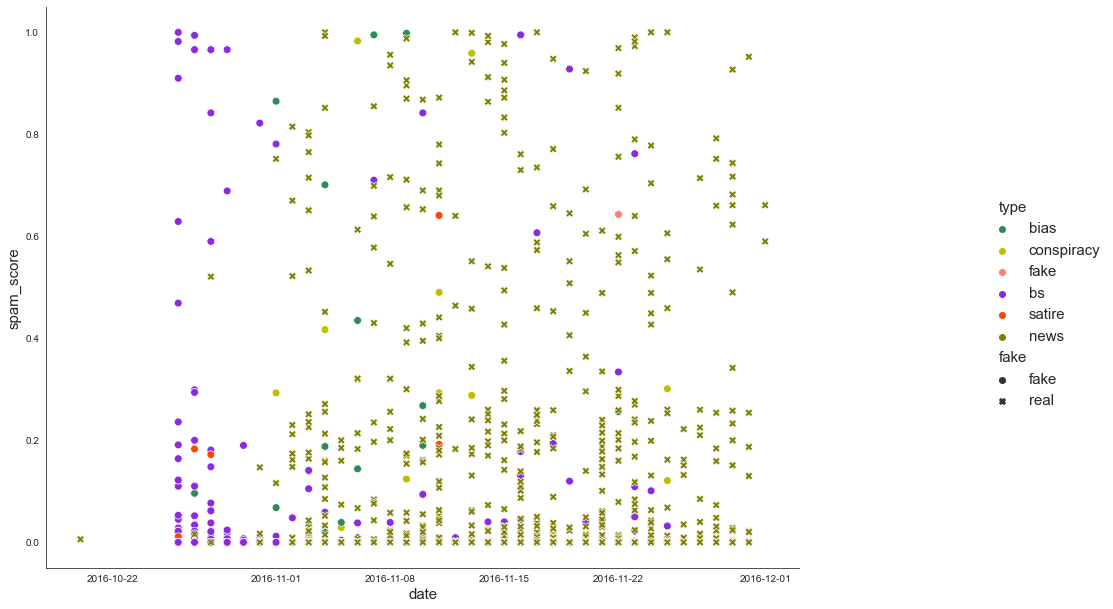

In [208]:
#rc={'axes.labelsize': 15, 'font.size': 10, 'legend.fontsize': 15.0, 'axes.titlesize': 10, 'figure.figsize':(11.7,8.27)}
#plt.rcParams.update(**rc)

g=sns.relplot(data=media, x='date', y='spam_score', hue='type',style='fake',s=60 , palette=my_colors[1:7])

g.fig.set_figwidth(16.27)
g.fig.set_figheight(8.7)
g.fig.savefig('docs/img/spam_date_fake_type_relplot.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()

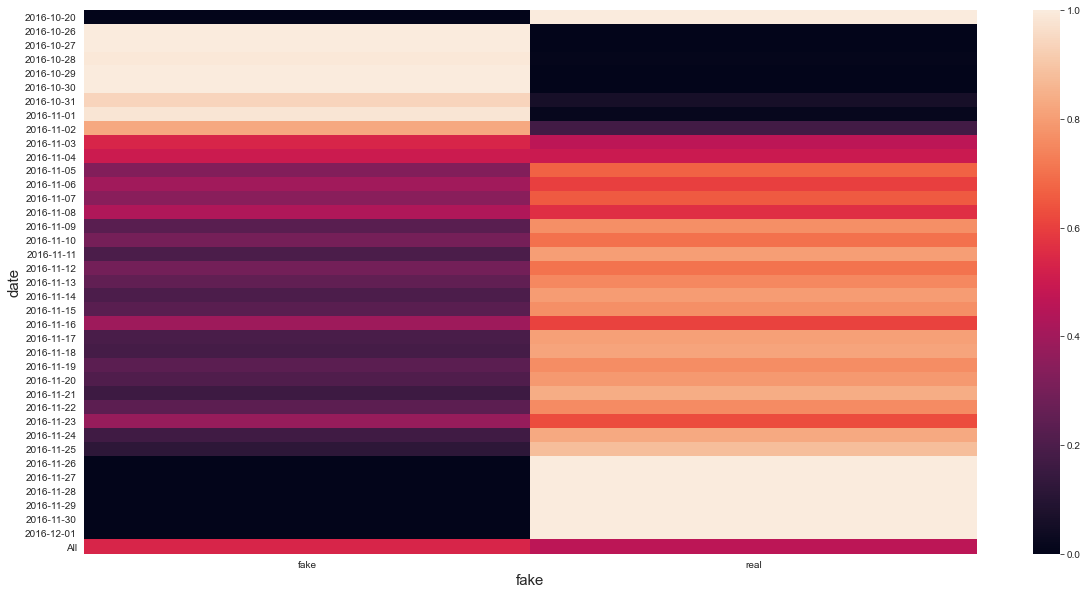

In [164]:
#dk_type = media.groupby("type").domain_rank.mean().round()
#pb_type  = media.groupby(['date',"type"]).domain_rank.mean().round()
#sns.catplot(data=media, x=pb_type.index[:][0], hue=pb_type.index[:][1], y=pb_type.values)
f, ax = plt.subplots(figsize = (20,10))
ax.grid()
ax =sns.heatmap((pd.crosstab(media.date, media.fake, margins=True, normalize="index")))

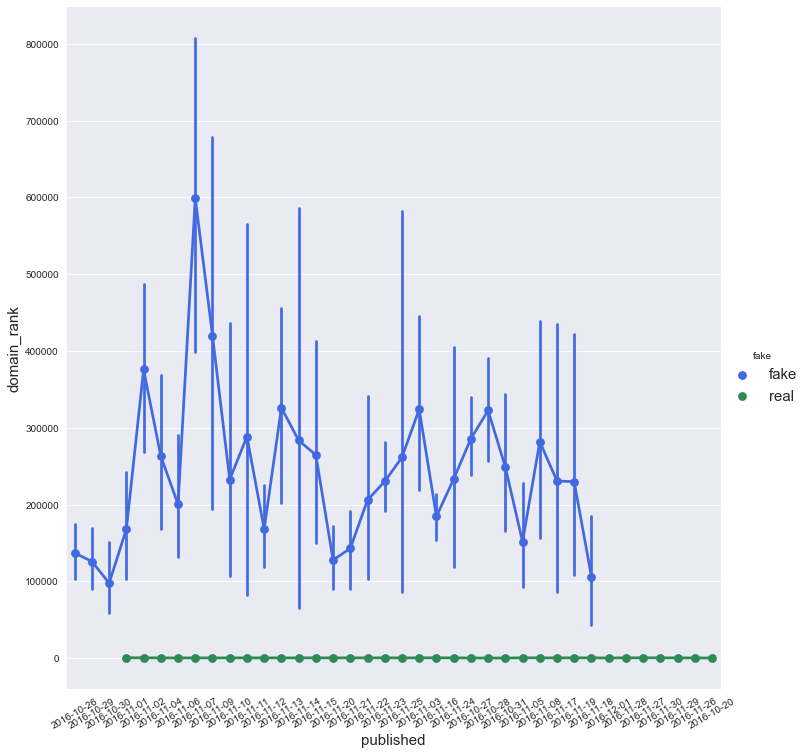

In [91]:
g = sns.factorplot(data=media, x="date", y='domain_rank', hue="fake", 
                   aspect=1.0, palette=my_colors, size=10, marker="D", edgecolor="gray")
sns.set_style("darkgrid")
g.set_xticklabels(rotation=30)

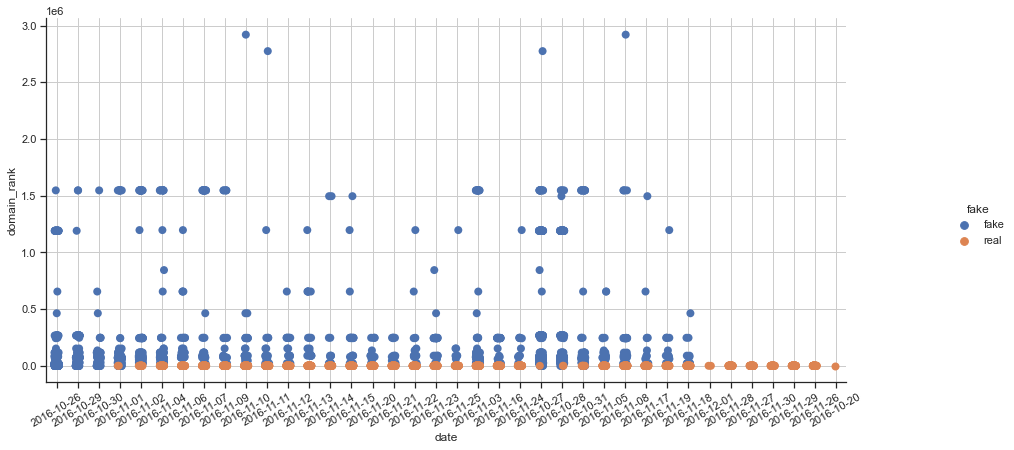

In [209]:
sns.set(style="ticks")
ax = sns.catplot(data=media, x='date', hue='fake', y='domain_rank',  s = 8)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(15)
ax.set_xticklabels(rotation=30)
plt.grid() 
plt.show()

ValueError: Could not interpret value `type` for parameter `style`

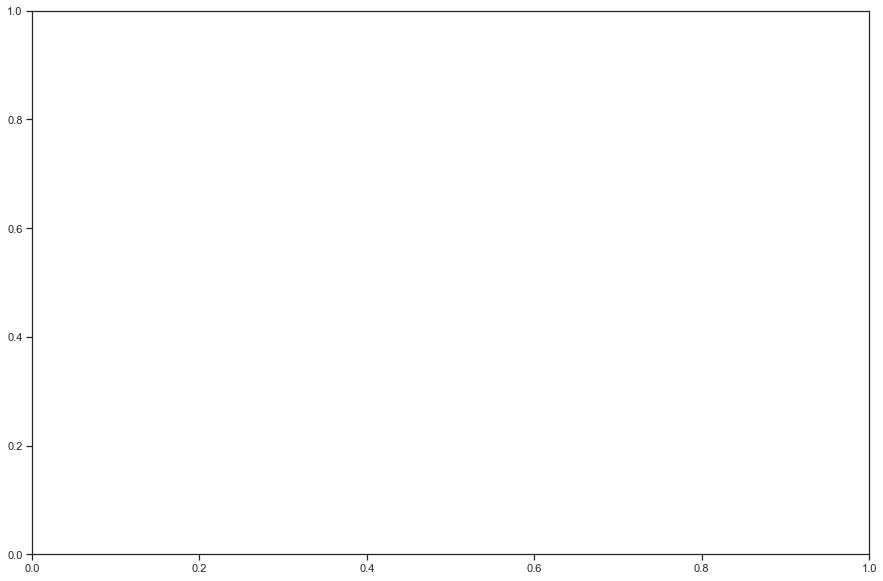

In [308]:
#ax = media.groupby("site_url")[['spam_score','src_url_polarity']].mean().plot(color=my_colors[3:])

url_grp = media.groupby("date")[['spam_score','src_url_polarity']].mean().reset_index()
d1 = url_grp.melt(id_vars="date", value_vars=['spam_score','src_url_polarity'], var_name='src_url')
#
sns.set(style="ticks")
f, ax = plt.subplots(figsize = (15,10))

ax = sns.lineplot('date', 'value', data=d1, hue='src_url', palette="Set2")
ax.grid()
ax.set_xticklabels(media['date'],rotation=30) 
plt.show()
f.savefig('docs/img/spam_popularity.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)


#### Let's check correlations for columns in dataset

In [210]:
media_corr = media.corr() #corelation matrix
media_corr

,domain_rank,spam_score,replies_count,participants_count,shares,src_url_polarity,sentiment_score,stance_factor_num
domain_rank,1.000000,-0.067599,-0.049880,-0.037048,0.050336,0.316181,-0.066524,0.209693
spam_score,-0.067599,1.000000,-0.034754,-0.044708,0.006128,-0.076754,0.049220,-0.099400
replies_count,-0.049880,-0.034754,1.000000,0.991364,-0.031113,0.161604,0.021805,-0.071550
participants_count,-0.037048,-0.044708,0.991364,1.000000,-0.031134,0.181719,0.016708,-0.062487
shares,0.050336,0.006128,-0.031113,-0.031134,1.000000,-0.006060,0.052054,-0.012603
src_url_polarity,0.316181,-0.076754,0.161604,0.181719,-0.006060,1.000000,-0.064444,0.178983
sentiment_score,-0.066524,0.049220,0.021805,0.016708,0.052054,-0.064444,1.000000,-0.047109
stance_factor_num,0.209693,-0.099400,-0.071550,-0.062487,-0.012603,0.178983,-0.047109,1.000000


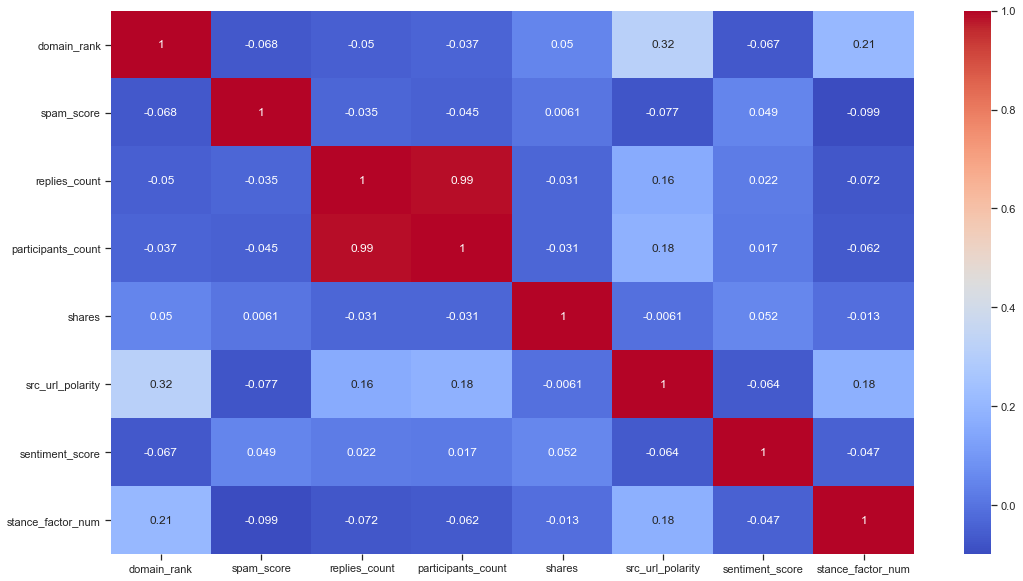

In [211]:
fig = plt.figure(figsize = (18,10))
sns.heatmap(media_corr, annot=True, cmap='coolwarm')
fig.savefig('docs/img/media_cor-matrix_heat_map.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

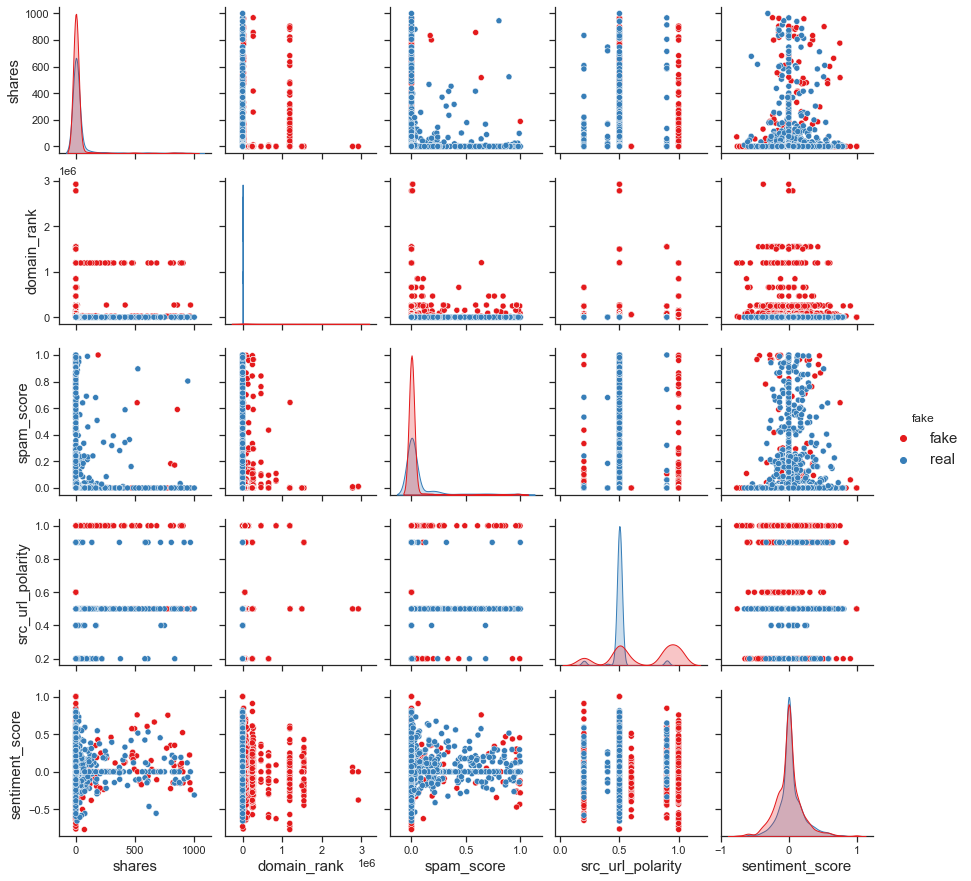

In [216]:
# Pair plot
rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15.0, 'axes.titlesize': 15, 'figure.figsize':(20.7,20.27)}
plt.rcParams.update(**rc)
media_cols= media[[ 'shares','domain_rank','spam_score','fake',
                   'src_url_polarity','stance','sentiment_score']]
media_cols.head()
g = sns.pairplot(data=media_cols, hue="fake", dropna='true', palette='Set1')
g.fig.savefig('docs/img/fake_pairplot.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)